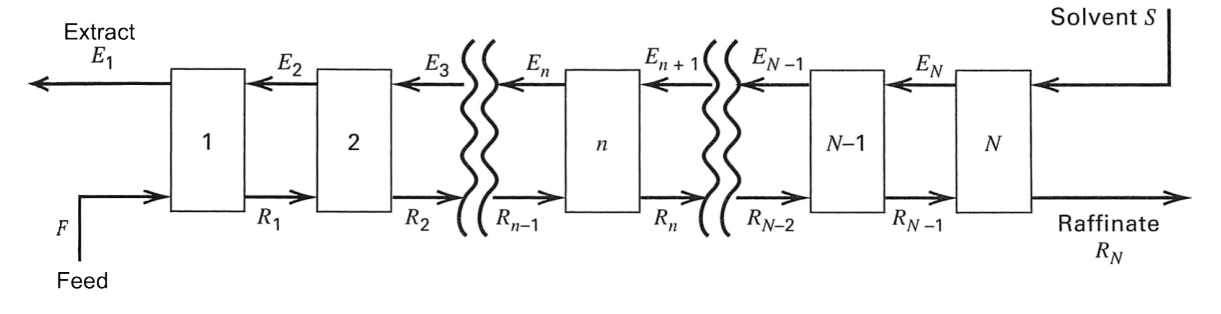

Extract1: XAE1= 0.41633884656612696 XBE1= 0.5096270423317322 XCE1= 0.07403411110214086
Raffinate1: XAR1= 0.1531717179270777 XBR1= 0.011052375464474719 XCR1= 0.8357759066084476
Extract2: XAE2= 0.14715733331500824 XBE2= 0.8424652159851144 XCE2= 0.010377450699877389
Raffinate2: XAR2= 0.03856470419926417 XBR2= 0.001061969865099167 XCR2= 0.9603733259356366


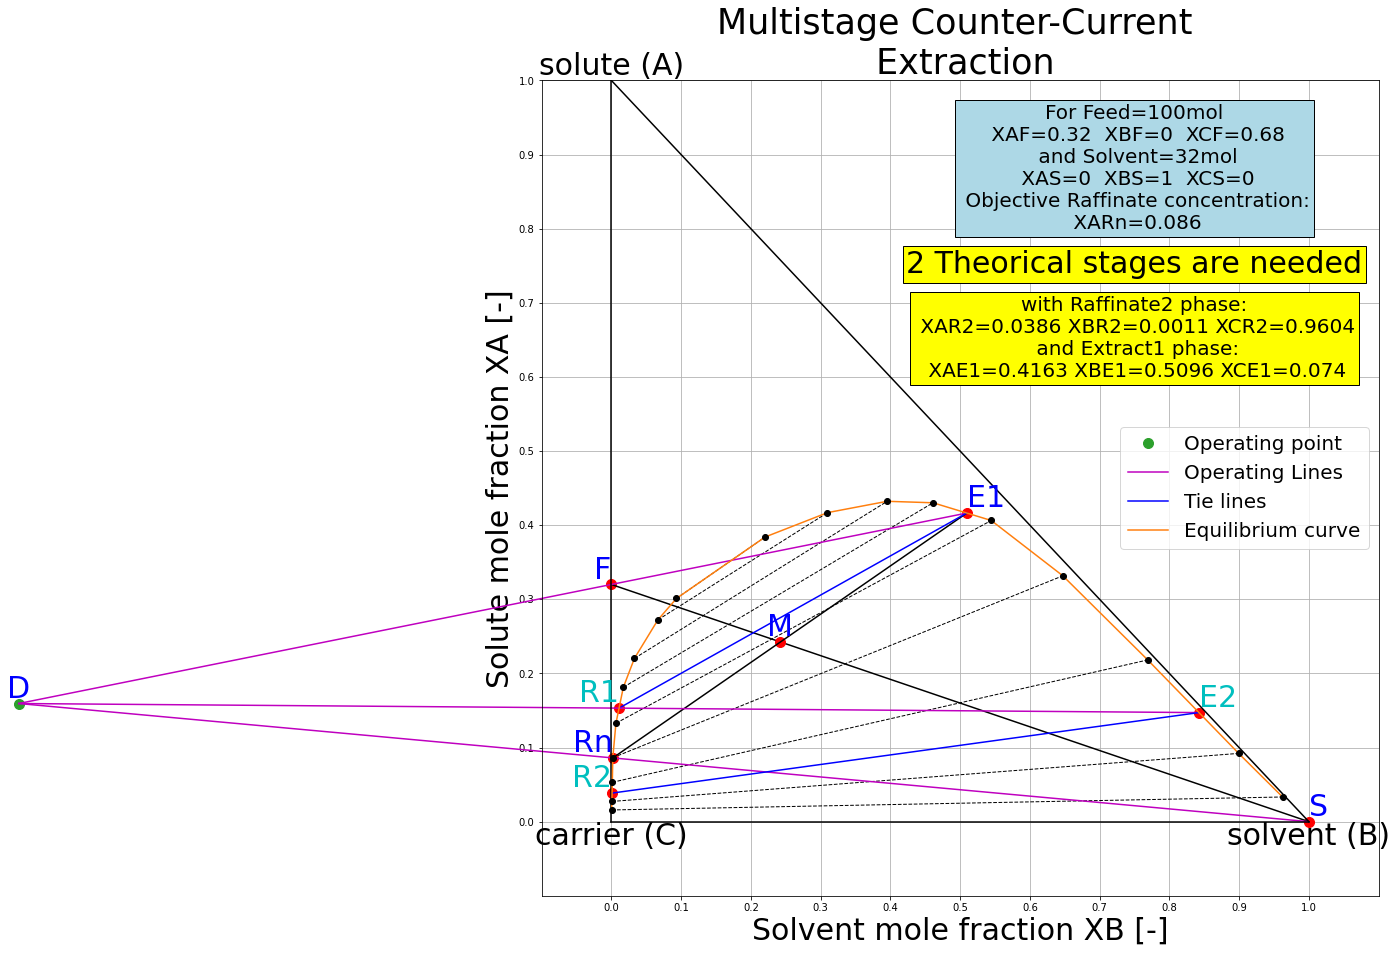

In [65]:
import numpy as np
import matplotlib.pyplot as plt
### Equilibrium line here the firt element is solvent concentration 
### and the second elemnt is solute concentration (XB,XA)
xy_equi=[(0.0005, 0.0158), (0.0008, 0.0273), (0.0014, 0.0531), (0.0021, 0.0863),
         (0.0066, 0.1328),(0.0172, 0.1813), (0.0331, 0.2203), (0.0668, 0.2723), 
         (0.0933, 0.3011), (0.9624, 0.0333), (0.8994, 0.0921), (0.769, 0.2182),
         (0.6473, 0.3317), (0.5447, 0.4063), (0.4612, 0.4302), (0.3955, 0.4322),
         (0.3099, 0.4169), (0.2204, 0.384)]

### intial flows and concentrations
F=100
XAF=0.32; XBF=0; XCF=0.68
S=32
XAS=0; XBS=1; XCS=0
XARn=0.086


#__________________________________________________________________________________________
## Showing diagram for didactic purposes
from PIL import Image
myImage = Image.open("Multistage Counter-Current Extraction.png")
display(myImage)

### Defining matemathical functions
def Line_eq(x1,y1,x2,y2,pointx):
    m=(y2-y1)/(x2-x1)
    pointy=m*(pointx-x1)+y1 #対角線
    return pointy

def slope(x1,y1,x2,y2):
    m=(y2-y1)/(x2-x1)
    return m

def intercept(x1,y1,x2,y2):
    m=(y2-y1)/(x2-x1)
    b=-m*x1+y1
    return b

def Line_eq2(m,x1,y1,pointx):
    y=m*(pointx-x1)+y1 #対角線
    return y

def Line_x(x1,y1,x2,y2,pointy):
    m=(y2-y1)/(x2-x1)
    pointx=(pointy-y1)/m+x1
    return pointx

def x_from2lines(b1,m1,b2,m2):
    x_interception=-(b2-b1)/(m2-m1)
    return x_interception

## sorting equilibrium line
def takeFirst(elem):
    return elem[0]
# sort list with key
xy_equi.sort(key=takeFirst)
xy_equi = np.array(xy_equi)

plt.figure(figsize=(15,15))
#__________________________________________________________________________________________
### 対角線=Diagonal Line
x=np.linspace(0,1,101)
yd=1-x #対角線

### ploting equilibrium lines

for i in range(int(len(xy_equi)/2)):
    xrange=np.linspace(xy_equi[i,0],xy_equi[-1-i,0],101)
    yrange=Line_eq(xy_equi[i,0],xy_equi[i,1],xy_equi[-1-i,0],xy_equi[-1-i,1],xrange)
    plt.plot(xrange,yrange,'--',color='k',linewidth=1.0)

## Starting points
plt.plot(XBF,XAF,'ro',markersize=10)
plt.text(XBF,XAF,'F',color='b',fontsize=30,ha='right',va='bottom')
plt.plot(XBS,XAS,'ro',markersize=10)
plt.text(XBS,XAS,'S',color='b',fontsize=30,ha='left',va='bottom')

### F-M-S line
M=F+S
XAM=(F*XAF+S*XAS)/M; XBM=(F*XBF+S*XBS)/M; XCM=1-XAM-XBM  
yM=Line_eq(XBS,XAS,XBF,XAF,x) #M Line
plt.text(XBM,XAM,'M',color='b',fontsize=30,ha='center',va='bottom')
plt.plot(x,yM, color='k') #M line
plt.plot(XBM,XAM,'ro',markersize=10)

## Finding XBRn
for i in range(int(len(xy_equi)/2)):
    if XARn <= xy_equi[i,1]:
        break
XBRn=Line_x(xy_equi[i,0],xy_equi[i,1],xy_equi[i-1,0],xy_equi[i-1,1],XARn)
plt.plot(XBRn,XARn,'ro',markersize=10)
plt.text(XBRn,XARn,'Rn',color='b',fontsize=30,ha='right',va='bottom')

m_E1_Rn=slope(XBM,XAM,XBRn,XARn)
b_E1_Rn=intercept(XBM,XAM,XBRn,XARn)

## Finding XAE1 and XBE1
for i in range(len(xy_equi)):
    if Line_eq2(m_E1_Rn,XBRn,XARn,xy_equi[i,0]) >= xy_equi[i,1] and xy_equi[i,1]>XARn:
        break
        
m_E1eq=slope(xy_equi[i,0],xy_equi[i,1],xy_equi[i-1,0],xy_equi[i-1,1])
b_E1eq=intercept(xy_equi[i,0],xy_equi[i,1],xy_equi[i-1,0],xy_equi[i-1,1])
XBE1=x_from2lines(b_E1eq,m_E1eq,b_E1_Rn,m_E1_Rn)
XAE1=m_E1eq*XBE1+b_E1eq
plt.plot(XBE1,XAE1,'ro',markersize=10)
plt.text(XBE1,XAE1,'E1',color='b',fontsize=30,ha='left',va='bottom')

## Saving values of XAE1 and XBE1
XAE1_initial=XAE1; XBE1_initial=XBE1

### Rn-M-E1 line
x_RnME1=np.linspace(XBRn,XBE1,101)
y_RnME1=Line_eq2(m_E1_Rn,XBRn,XARn,x_RnME1)
plt.plot(x_RnME1,y_RnME1, color='k')

## Finding D, operating point
m_FE1=slope(XBF,XAF,XBE1,XAE1)
b_FE1=intercept(XBF,XAF,XBE1,XAE1)
m_RnS=slope(XBRn,XARn,XBS,XAS)
b_RnS=intercept(XBRn,XARn,XBS,XAS)

XD=x_from2lines(b_FE1,m_FE1,b_RnS,m_RnS)
YD=m_FE1*XD+b_FE1
plt.plot(XD,YD,'o',color='tab:green',markersize=10,label='Operating point',clip_on=False)
plt.text(XD,YD,'D',color='b',fontsize=30,ha='center',va='bottom')

## Plotting first two operating lines
x_DFE1=np.linspace(XD,XBE1,101)
y_DFE1=Line_eq2(m_FE1,XD,YD,x_DFE1)
plt.plot(x_DFE1,y_DFE1,label='Operating Lines', color='m',clip_on=False)

x_DRnS=np.linspace(XD,XBS,101)
y_DRnS=Line_eq2(m_RnS,XD,YD,x_DRnS)
plt.plot(x_DRnS,y_DRnS,color='m',clip_on=False)

##loop for iterating Raffinates and Extracts, the first Number of stages is fixed as 1. Using 'i' for the localization of E1
## Here E1, R1 and E2 are used symbolically so that the iteration is easier to understand
stages=1
while True:
    x_belowE1=xy_equi[i,0]; y_belowE1=xy_equi[i,1]
    x_belowE1_eq=xy_equi[-i-1,0]; y_belowE1_eq=xy_equi[-i-1,1]
    x_aboveE1=xy_equi[i-1,0]; y_aboveE1=xy_equi[i-1,1]
    x_aboveE1_eq=xy_equi[-i,0]; y_aboveE1_eq=xy_equi[-i,1]
    
    ## Finding R1
    d1=y_aboveE1-XAE1; d2=XAE1-y_belowE1
    XAR1=(y_belowE1_eq*d1+y_aboveE1_eq*d2)/(d1+d2)
    XBR1=(x_belowE1_eq*d1+x_aboveE1_eq*d2)/(d1+d2)
    plt.plot(XBR1,XAR1,'ro',markersize=10)
    plt.text(XBR1,XAR1,'R'+str(stages),color='c',fontsize=30,ha='right',va='bottom')
    
    ##Printing Extract and Raffinate data
    print("Extract"+str(stages)+":"+" XAE"+str(stages)+"=",XAE1,"XBE"+str(stages)+"=",XBE1,
          "XCE"+str(stages)+"=",1-XAE1-XBE1)
    print("Raffinate"+str(stages)+":"+" XAR"+str(stages)+"=",XAR1,"XBR"+str(stages)+"=",XBR1,
          "XCR"+str(stages)+"=",1-XAR1-XBR1)
    
    ## Plotting R1-E1 Tie line
    m_tieline=slope(XBR1,XAR1,XBE1,XAE1)
    x_R1E1=np.linspace(XBR1,XBE1,101)
    y_R1E1=Line_eq2(m_tieline,XBE1,XAE1,x_R1E1)
    
        ## This is for labeling just important lines
    Label1='_'
    if stages==1:
        Label1='Tie lines'
    plt.plot(x_R1E1,y_R1E1,label=Label1, color='blue')
    
    ## If this this condition is true the loop will end since we found a solute concentration smaller than the XARn (the objective final stage solute concentration )
    if XAR1 <= XARn:
        break   
        
    ## D-R1 slopes and intercepts
    m_DR1=slope(XBR1,XAR1,XD,YD)
    b_DR1=intercept(XBR1,XAR1,XD,YD)
    
    ##E2
    for j in range(len(xy_equi)):
        if XAE1<=xy_equi[j,0] and Line_eq2(m_DR1,XD,YD,xy_equi[j,0]) >= xy_equi[j,1]:
            break
        
    x_aboveE2=xy_equi[j-1,0]; y_aboveE2=xy_equi[j-1,1]
    x_belowE2=xy_equi[j,0]; y_belowE2=xy_equi[j,1]

    m_E2eq=slope(x_belowE2,y_belowE2,x_aboveE2,y_aboveE2)
    b_E2eq=intercept(x_belowE2,y_belowE2,x_aboveE2,y_aboveE2)
    XBE2=-(b_E2eq-b_DR1)/(m_E2eq-m_DR1)
    XAE2=m_E2eq*XBE2+b_E2eq
    plt.plot(XBE2,XAE2,'ro',markersize=10)
    plt.text(XBE2,XAE2,'E'+str(stages+1),color='c',fontsize=30,ha='left',va='bottom')
    
    ## Plotting D-R1-E2 operating line
    x_DR1=np.linspace(XD,XBE2,101)
    y_DR1=Line_eq2(m_DR1,XD,YD,x_DR1)
    plt.plot(x_DR1,y_DR1, color='m',clip_on=False)
    
    ##updating variables for the loop, making E2 equal to E1 for iteration
    i=j
    XBE1=XBE2
    XAE1=XAE2
    stages=stages+1 
      
##Plotting basic information
plt.grid()
plt.xticks(np.linspace(0,1,11))
plt.yticks(np.linspace(0,1,11))
plt.axis([-0.1, 1.1, -0.1, 1])
plt.plot(-1,0.5,'ro')
plt.axvline(0,ymin=1/11,color='k')
plt.axhline(0,xmin=1/12,xmax=11/12,color='k')
plt.title('Multistage Counter-Current \n Extraction', fontsize=35)
plt.xlabel('Solvent mole fraction XB [-]', fontsize=30)
plt.ylabel('Solute mole fraction XA [-]', fontsize=30)
plt.plot(x,yd,color='k') #対角線
plt.text(0,1,'solute (A)',color='k',fontsize=30,ha='center',va='bottom')
plt.text(1,0,'solvent (B)',color='k',fontsize=30,ha='center',va='top')
plt.text(0,0,'carrier (C)',color='k',fontsize=30,ha='center',va='top')
plt.plot(xy_equi[:,0],xy_equi[:,1],color='tab:orange',label='Equilibrium curve')
plt.plot(xy_equi[:,0],xy_equi[:,1],'o',color='k',)#Equilibrium points
plt.legend(loc=7,fontsize=20)

## Results written in the boxes
plt.text(0.75,0.8,"For Feed=" +str(np.round(F,decimals=2))+"mol" 
         "\n XAF="+str(np.round(XAF,decimals=4))+
         "  XBF="+str(np.round(XBF,decimals=4))+
         "  XCF="+str(np.round(XCF,decimals=4))+
         "\n and Solvent="+str(np.round(S,decimals=2))+"mol" 
         "\n XAS="+str(np.round(XAS,decimals=4))+
         "  XBS="+str(np.round(XBS,decimals=4))+
         "  XCS="+str(np.round(XCS,decimals=4))+
         "\n Objective Raffinate concentration:"+
         "\n XARn="+str(XARn), bbox={"fc":"lightblue"}, fontsize=20,
         ha='center')
plt.text(0.75,0.74,str(stages)+" Theorical stages are needed", bbox={"fc":"yellow"}, fontsize=30,
         ha='center')
plt.text(0.75,0.6,"with Raffinate"+str(stages)+" phase:"
         "\n XAR"+str(stages)+"="+str(np.round(XAR1,decimals=4))+
         " XBR"+str(stages)+"="+str(np.round(XBR1,decimals=4))+
         " XCR"+str(stages)+"="+str(np.round(1-XAR1-XBR1,decimals=4))+
         "\n and Extract1 phase:"
         "\n XAE1="+str(np.round(XAE1_initial,decimals=4))+
         " XBE1="+str(np.round(XBE1_initial,decimals=4))+
         " XCE1="+str(np.round(1-XAE1_initial-XBE1_initial,decimals=4)), bbox={"fc":"yellow"}, fontsize=20,
         ha='center')

plt.show()